### Life Expectancy 
Perform regression using this World Health Organization (WHO) dataset on life expectancy.   

In [1]:
import pandas as pd
data = pd.read_csv('Life Expectancy Data.csv')
data.head() 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Life expectancy age distribution

<Axes: xlabel='Life expectancy ', ylabel='Count'>

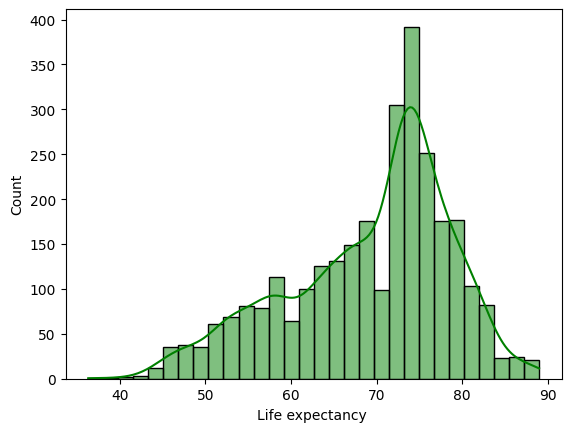

In [3]:
import seaborn as sns
sns.histplot(data['Life expectancy '].dropna(), kde=True, color='green')

### Data preprocessing
Perform data preprocessing and identify columns to be used. You may or may not use all the columns. Prepare the features and target data.
Prepare the train and test data.

#### Correlation Matrix
**I will utilize correlation matrix to determine which column I should use**

In [4]:
numeric_columns = data.select_dtypes(include=[float, int]).columns

In [5]:
correlation_matrix = data[numeric_columns].corr()

In [6]:
correlation_with_target = correlation_matrix['Life expectancy ']

In [7]:
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

In [8]:
print(sorted_correlation)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
Adult Mortality                    0.696359
 BMI                               0.567694
 HIV/AIDS                          0.556556
Diphtheria                         0.479495
 thinness  1-19 years              0.477183
 thinness 5-9 years                0.471584
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
under-five deaths                  0.222529
Total expenditure                  0.218086
infant deaths                      0.196557
Year                               0.170033
Measles                            0.157586
Population                         0.021538
Name: Life expectancy , dtype: float64


Based on the output, 

The following has **high positive correlation** with life expectancy:
- Income composition of resources
- Schooling

and

the following has **moderate positive correlations**  with life expectancy:
- Adult Mortality
- BMI
- HIV/AIDS
- Diphtheria
- Thinness 1-19 years
- Thinness 5-9 years

So, I will be choosing these columns.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data Cleaning

In [10]:
data.dropna(inplace=True)

In [11]:
data.drop_duplicates(inplace=True)

### Handling Outliers

In [12]:
from scipy import stats
import numpy as np

In [13]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[float, int])))

In [14]:
threshold = 3
outlier_rows = np.unique(np.where(z_scores > threshold)[0])

In [15]:
data_cleaned = data.drop(data.index[outlier_rows])

### Creating Polynomial Features

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures(degree=2)

In [18]:
X_poly = poly.fit_transform(data_cleaned[['Schooling', 'Income composition of resources', 'Adult Mortality', ' BMI ', ' HIV/AIDS', 'Diphtheria ', ' thinness  1-19 years', ' thinness 5-9 years']])

### Splitting the data

In [19]:
X = X_poly
y = data_cleaned['Life expectancy ']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Perform regression on the dataset.
The goal is to use regression on the dataset with the best result you can.

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg_model = LinearRegression()

In [24]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = reg_model.predict(X_test)

### Show results.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [27]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()

,Actual,Predicted
2492,56.5,57.267027
2660,69.4,72.816449
1060,71.4,70.201245
147,71.9,74.723124
107,73.0,73.044649


Comparing the test data and the predicted values with a scatter plot:

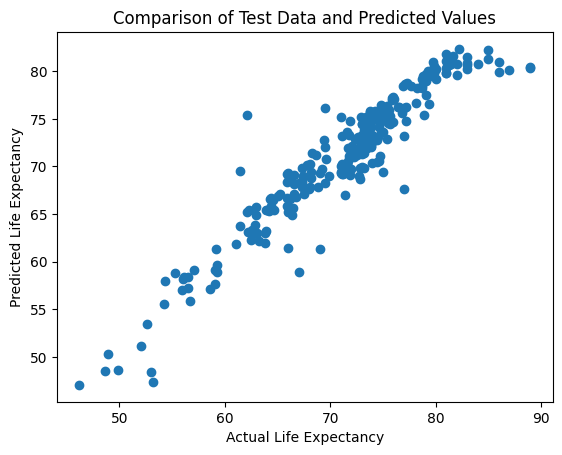

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Comparison of Test Data and Predicted Values')
plt.show()

In [29]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.6987049124771538


In [30]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 6.028262692915814


In [31]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.455252063010194


In [32]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")

R-squared (R2) Score: 0.90


### Conclusion

Write a brief conclusion here. (5 points)

The dataset has been preprocessed by handling missing values, duplicates, and outliers. These steps help ensure the data quality and reliability of the analysis. Also, the original features were transformed into polynomial features of degree 2 using the PolynomialFeatures class. This allows capturing potential nonlinear relationships between the features and the target variable.

The regression model demonstrates a strong ability to predict life expectancy based on the selected features. The R-squared (R2) score of 0.90 indicates that approximately 90% of the variability in the target variable can be explained by the model. This suggests that the chosen features have a significant impact on life expectancy.